In [4]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
%matplotlib inline

In [5]:
data = pd.read_csv("data_csvs/mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
# in order to better understand data during EDA, we should convert letter values to full words
cap_shape={"b":"bell","c":"conical","x":"convex","f":"flat","k":"knobbed","s":"sunken"}
data["cap-shape"]=data["cap-shape"].replace(cap_shape)

cap_surface={"f": "fibrous", "g": "grooves","y":"scaly","s": "smooth"}
data["cap-surface"]=data["cap-surface"].replace(cap_surface)

cap_color={"n":"brown","b":"buff","c":"cinnamon","g":"gray","r":"green","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
data["cap-color"]=data["cap-color"].replace(cap_color)

odor={"a":"almond","l":"anise","c":"creosote","y":"fishy","f":"foul","m":"musty","n":"none","p":"pungent","s":"spicy"}
data["odor"]=data["odor"].replace(odor)

gill_attachment={"a":"attached","f":"free", "d":"descending", "n":"notched"}
data["gill-attachment"]=data["gill-attachment"].replace(gill_attachment)

gill_spacing={"c":"close","w":"crowded", "d":"distant"}
data["gill-spacing"]=data["gill-spacing"].replace(gill_spacing)

gill_size={"b":"broad","n":"narrow"}
data["gill-size"]=data["gill-size"].replace(gill_size)

gill_color={"k":"black","b":"buff","n":"brown","h":"chocolate","g":"gray","r":"green","o":"orange","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
data["gill-color"]=data["gill-color"].replace(gill_color)

stalk_shape={"t":"tapering","e":"enlarging"}
data["stalk-shape"]=data["stalk-shape"].replace(stalk_shape)

stalk_root={"b":"bulbous","c":"club","e":"equal","z":"rhizomorphs","r":"rooted","?":"missing"}
data["stalk-root"]=data["stalk-root"].replace(stalk_root)

stalk_surface_above_ring={"s":"smooth","k":"silky","f":"fibrous","y":"scaly"}
data["stalk-surface-above-ring"]=data["stalk-surface-above-ring"].replace(stalk_surface_above_ring)
data["stalk-surface-below-ring"]=data["stalk-surface-below-ring"].replace(stalk_surface_above_ring)

stalk_color_above_ring={"n":"brown","b":"buff","c":"cinnamon","g":"gray","p":"pink","e":"red","w":"white","y":"yellow","o":"orange"}
data["stalk-color-above-ring"]=data["stalk-color-above-ring"].replace(stalk_color_above_ring)
data["stalk-color-below-ring"]=data["stalk-color-below-ring"].replace(stalk_color_above_ring)

veil_type={"p":"partial","u":"universal"} 
data["veil-type"]=data["veil-type"].replace(veil_type)

veil_color={"n":"brown","o":"orange","w":"white","y":"yellow"} 
data["veil-color"]=data["veil-color"].replace(veil_color)

ring_number= {"n":"none","o":"one","t":"two"}
data["ring-number"]=data["ring-number"].replace(ring_number)

ring_type={"c":"cobwebby","e":"evanescent","f":"flaring","l":"large","n":"none","p":"pendant","s":"sheathing","z":"zone"}
data["ring-type"]=data["ring-type"].replace(ring_type)

spore_print_color= {"k":"black","n":"brown","b":"buff","h":"chocolate","r":"green","o":"orange","u":"purple","w":"white","y":"yellow"}
data["spore-print-color"]=data["spore-print-color"].replace(spore_print_color)

population={"a":"abundant","c":"clustered","n":"numerous","s":"scattered","v":"several","y":"solitary"}
data["population"]=data["population"].replace(population)

habitat={"g":"grasses","l":"leaves","m":"meadows","p":"paths","u":"urban","w":"waste","d":"woods"}
data["habitat"]=data["habitat"].replace(habitat)

bruises={"t":"bruises","f":"no"}
data["bruises"]=data["bruises"].replace(bruises)

classification={"e":"edible","p":"poisonous"}
data["class"]=data["class"].replace(classification)

print(data.iloc[1].values)

['edible' 'convex' 'smooth' 'yellow' 'bruises' 'almond' 'free' 'close'
 'broad' 'black' 'enlarging' 'club' 'smooth' 'smooth' 'white' 'white'
 'partial' 'white' 'one' 'pendant' 'brown' 'numerous' 'grasses']


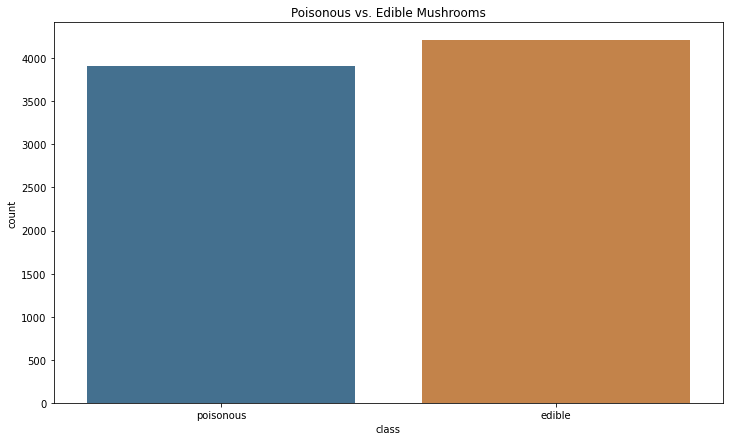

In [8]:
plt.figure(figsize=(12,7))
class_plt = sns.countplot(x = 'class', data = data, saturation = 0.5).set(title="Poisonous vs. Edible Mushrooms")

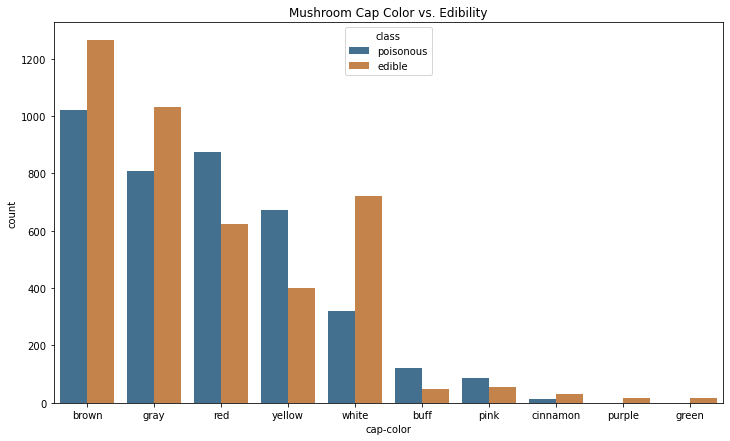

In [9]:
plt.figure(figsize=(12,7))
color_class_plt = sns.countplot(x = 'cap-color', data = data, hue = 'class', order = data['cap-color'].value_counts().index, saturation = 0.5).set(title = "Mushroom Cap Color vs. Edibility")

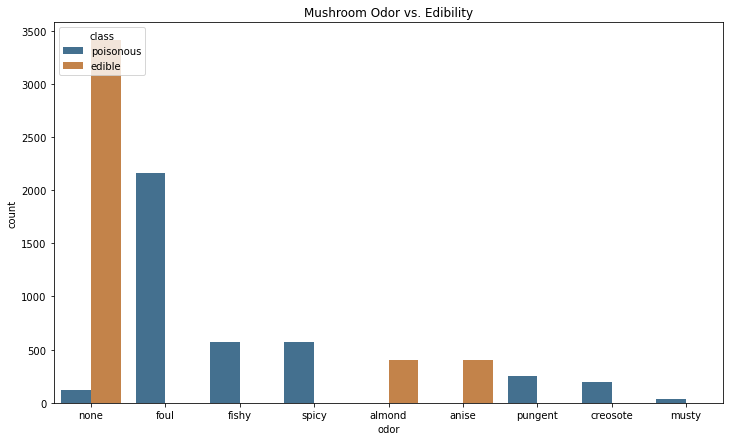

In [10]:
plt.figure(figsize=(12,7))
odor_class_plt = sns.countplot(x = 'odor', data = data, hue = 'class', order = data['odor'].value_counts().index, saturation = 0.5).set(title = "Mushroom Odor vs. Edibility")

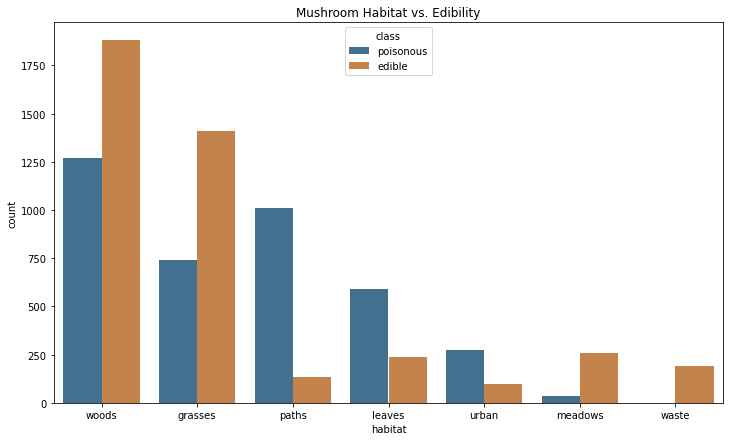

In [11]:
plt.figure(figsize=(12,7))
odor_class_plt = sns.countplot(x = 'habitat', data = data, hue = 'class', order = data['habitat'].value_counts().index, saturation = 0.5).set(title = "Mushroom Habitat vs. Edibility")

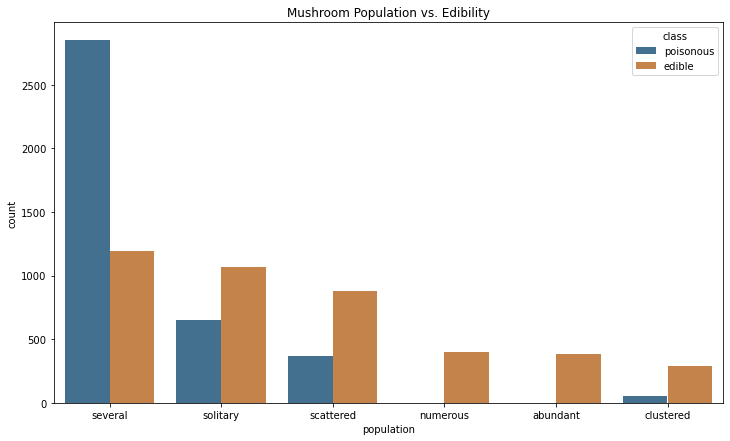

In [12]:
plt.figure(figsize=(12,7))
odor_class_plt = sns.countplot(x = 'population', data = data, hue = 'class', order = data['population'].value_counts().index, saturation = 0.5).set(title = "Mushroom Population vs. Edibility")

In [13]:
# Turn data from categorical to numerical data for model training. 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
print(data.iloc[1])
for col in data.columns:
    data[col] = label_encoder.fit_transform(data[col])
#     label_encoder.fit(data[col])
#     data[col] = label_encoder.transform(data[col])
x = data.drop('class', axis = 1)
y = data["class"].values

print(data.iloc[1])

class                          edible
cap-shape                      convex
cap-surface                    smooth
cap-color                      yellow
bruises                       bruises
odor                           almond
gill-attachment                  free
gill-spacing                    close
gill-size                       broad
gill-color                      black
stalk-shape                 enlarging
stalk-root                       club
stalk-surface-above-ring       smooth
stalk-surface-below-ring       smooth
stalk-color-above-ring          white
stalk-color-below-ring          white
veil-type                     partial
veil-color                      white
ring-number                       one
ring-type                     pendant
spore-print-color               brown
population                   numerous
habitat                       grasses
Name: 1, dtype: object
class                       0
cap-shape                   2
cap-surface                 3
cap-color    

In [14]:
# Split data to prepare for training with models
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state= 100)
print(len(X_test))
print(len(y_test))

2031
2031


In [15]:
# After splitting our datasets, we must scale the data in accordance to the training data to keep training consistent 
from sklearn.preprocessing import MinMaxScaler

scaled = MinMaxScaler()
scaled.fit(X_train)

X_train = scaled.transform(X_train)
X_test = scaled.transform(X_test)

In [16]:
print(X_train)
np.savetxt("data_csvs\X_train.csv", X_train)
np.savetxt("data_csvs\X_test.csv", X_test)
np.savetxt("data_csvs\y_train.csv", y_train)
np.savetxt("data_csvs\y_test.csv", y_test)

[[0.4        0.         0.33333333 ... 0.375      0.8        1.        ]
 [0.4        0.66666667 0.         ... 0.875      0.8        0.5       ]
 [0.6        0.66666667 0.33333333 ... 0.         1.         1.        ]
 ...
 [0.         0.         0.         ... 0.875      0.8        1.        ]
 [0.8        0.66666667 0.         ... 0.875      0.8        1.        ]
 [0.8        1.         0.         ... 0.875      0.2        0.83333333]]


In [17]:
## We now want to save this scaling model to apply to input data
import joblib
joblib.dump(scaled, 'models\scaled.save')

['models\\scaled.save']

In [18]:
# Now that our data has successfully been scaled, we can now begin training ML models to our data. 

In [19]:
# MODEL 1: DECISION TREES AND RANDOM FORESTS
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [20]:
predictions = rfc.predict(X_test)

In [21]:
# Performance Analysis
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1044
           1       1.00      1.00      1.00       987

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

[[1044    0]
 [   0  987]]


In [22]:
#MODEL 2: ANN VIA KERAS
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [24]:
model = Sequential()

model.add(Dense(units=22,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=11,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [25]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
191/191 [==============================] - 1s 2ms/step - loss: 0.6504 - accuracy: 0.6199 - val_loss: 0.4816 - val_accuracy: 0.9143
Epoch 2/600
191/191 [==============================] - 0s 1ms/step - loss: 0.4894 - accuracy: 0.8032 - val_loss: 0.3079 - val_accuracy: 0.9296
Epoch 3/600
191/191 [==============================] - 0s 987us/step - loss: 0.3816 - accuracy: 0.8608 - val_loss: 0.2145 - val_accuracy: 0.9444
Epoch 4/600
191/191 [==============================] - 0s 992us/step - loss: 0.3077 - accuracy: 0.8905 - val_loss: 0.1544 - val_accuracy: 0.9621
Epoch 5/600
191/191 [==============================] - 0s 963us/step - loss: 0.2546 - accuracy: 0.9186 - val_loss: 0.1139 - val_accuracy: 0.9631
Epoch 6/600
191/191 [==============================] - 0s 1ms/step - loss: 0.2223 - accuracy: 0.9286 - val_loss: 0.0907 - val_accuracy: 0.9675
Epoch 7/600
191/191 [==============================] - 0s 971us/step - loss: 0.1958 - accuracy: 0.9380 - val_loss: 0.0796 - val_accuracy

191/191 [==============================] - 0s 974us/step - loss: 0.0508 - accuracy: 0.9816 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 58/600
191/191 [==============================] - 0s 984us/step - loss: 0.0503 - accuracy: 0.9813 - val_loss: 0.0035 - val_accuracy: 0.9990
Epoch 59/600
191/191 [==============================] - 0s 982us/step - loss: 0.0496 - accuracy: 0.9826 - val_loss: 0.0029 - val_accuracy: 0.9995
Epoch 60/600
191/191 [==============================] - 0s 976us/step - loss: 0.0512 - accuracy: 0.9810 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 61/600
191/191 [==============================] - 0s 984us/step - loss: 0.0575 - accuracy: 0.9759 - val_loss: 0.0036 - val_accuracy: 0.9995
Epoch 62/600
191/191 [==============================] - 0s 963us/step - loss: 0.0538 - accuracy: 0.9793 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 63/600
191/191 [==============================] - 0s 966us/step - loss: 0.0552 - accuracy: 0.9782 - val_loss: 0.0029 - val_accuracy

191/191 [==============================] - 0s 1ms/step - loss: 0.0367 - accuracy: 0.9874 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 114/600
191/191 [==============================] - 0s 998us/step - loss: 0.0456 - accuracy: 0.9834 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 115/600
191/191 [==============================] - 0s 990us/step - loss: 0.0440 - accuracy: 0.9839 - val_loss: 6.5239e-04 - val_accuracy: 1.0000
Epoch 116/600
191/191 [==============================] - 0s 1ms/step - loss: 0.0385 - accuracy: 0.9860 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 117/600
191/191 [==============================] - 0s 1ms/step - loss: 0.0399 - accuracy: 0.9856 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 118/600
191/191 [==============================] - 0s 1ms/step - loss: 0.0430 - accuracy: 0.9841 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 119/600
191/191 [==============================] - 0s 1ms/step - loss: 0.0428 - accuracy: 0.9826 - val_loss: 0.0012 - val_accuracy

<AxesSubplot:>

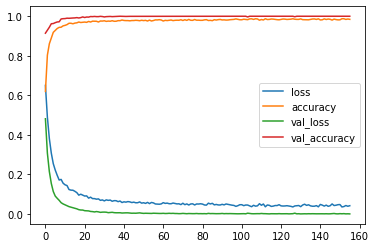

In [26]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [27]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

64/64 [==============================] - 0s 564us/step


In [28]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1044
           1       1.00      1.00      1.00       987

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

[[1044    0]
 [   0  987]]


In [29]:
# SAVING MODEL TO BE DEPLOYED
model.save('models\model.h5')
model_final = load_model('models\model.h5')